In [46]:
# Analyse et Visualisation des Données

## 1. Importation des Bibliothèques


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Paramètres d'affichage pour les graphiques
plt.style.use('ggplot')


In [55]:
## 2. Chargement des Données


In [56]:
# Chargement des données
train_images = np.load('data/processed/test_images.npy')
train_labels = np.load('data/processed/train_labels.npy')
test_images = np.load('data/processed/test_images.npy')
test_labels = np.load('data/processed/test_labels.npy')

# Vérification des dimensions des données
print("Train Images Shape:", train_images.shape)
print("Train Labels Shape:", train_labels.shape)
print("Test Images Shape:", test_images.shape)
print("Test Labels Shape:", test_labels.shape)


Train Images Shape: (7178, 48, 48, 1)
Train Labels Shape: (28709, 7)
Test Images Shape: (7178, 48, 48, 1)
Test Labels Shape: (7178, 7)


In [57]:
## 3. Visualisation des Données
### 3.1. Distribution des Labels


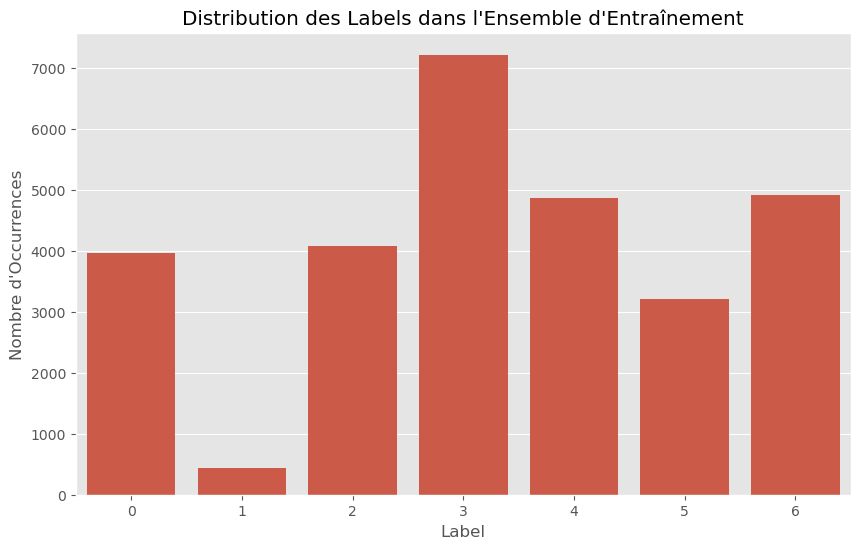

In [58]:
# Distribution des labels dans l'ensemble d'entraînement

# Conversion des labels one-hot encodés en labels numériques
numeric_train_labels = np.argmax(train_labels, axis=1)

label_counts = pd.Series(numeric_train_labels).value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Distribution des Labels dans l\'Ensemble d\'Entraînement')
plt.xlabel('Label')
plt.ylabel('Nombre d\'Occurrences')
plt.show()


In [59]:
### 3.2. Exemples d'Images


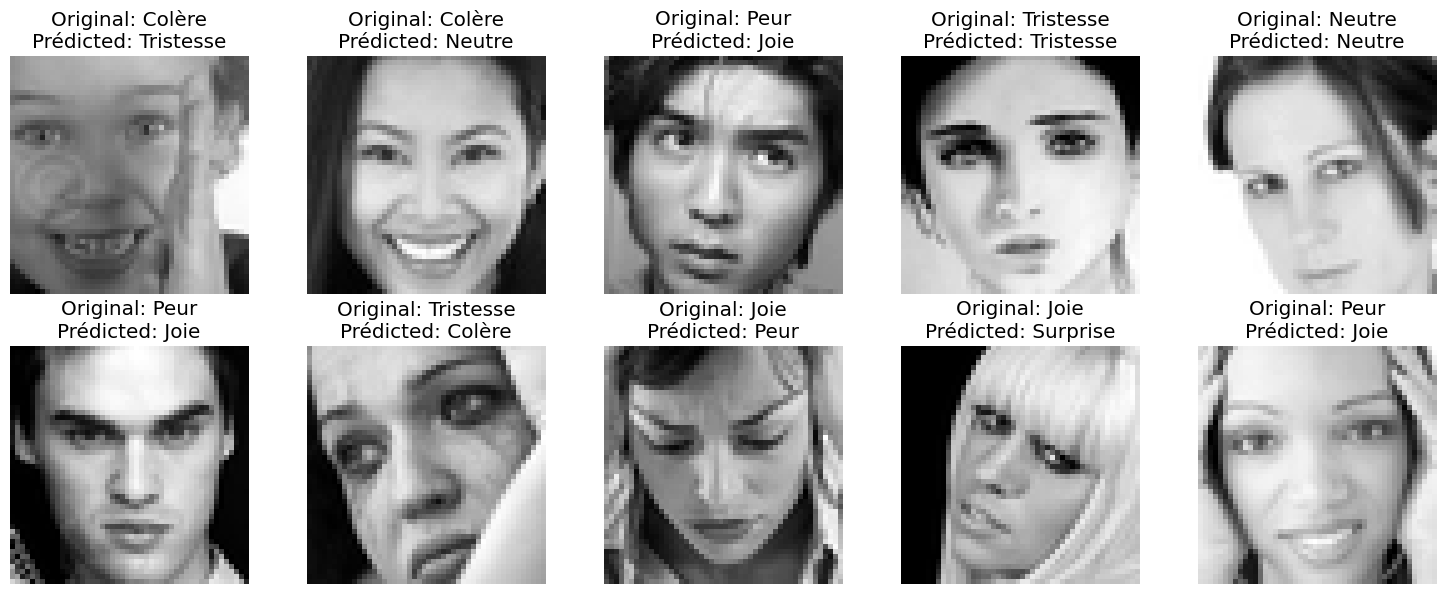

In [61]:
# Affichage de quelques exemples d'images
# Charger le dataset FER-2013
data = pd.read_csv('data/raw/fer2013.csv')

# Fonction pour obtenir le label d'émotion à partir du dataset original
def get_original_emotion_label(index):
    emotion_labels = ['Colère', 'Dégoût', 'Peur', 'Joie', 'Tristesse', 'Surprise', 'Neutre']
    emotion_index = data.iloc[index]['emotion']
    return emotion_labels[emotion_index]

# Affichage des images et comparaison des labels
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

for i in range(10):
    img = train_images[i]
    original_label = get_original_emotion_label(i)
    predicted_label = get_emotion_from_label(train_labels[i])
    
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f'Original: {original_label}\nPrédicted: {predicted_label}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()
